In [ ]:
import pandas as pd
import numpy as np

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[-0.6070944  -0.30131027 -0.40564502 -0.60619406 -0.16411638]
 [ 0.86416142  0.60108778  0.82257652  1.64659144  0.90168435]
 [-0.84951723 -0.74290932 -0.80327069 -0.8058618  -0.56595064]
 [ 0.23720581  1.5610857   1.44994147 -0.51446415  0.22185599]
 [ 0.23720581  0.21708861  0.40727859  1.18941323  0.17403536]]


# **K최근접이웃 알고리즘을 이용한 분류기의 확률 예측**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#n_neighbors:하나의 데이터를 예측하기위해 볼 주변데이터의 개수를 나타내는 매개변수
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8739495798319328
0.825


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#테스트 세트의 앞의 다섯개 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Perch' 'Perch' 'Parkki' 'Perch']


In [ ]:
proba = kn.predict_proba(test_scaled[:5])
#numpy패키지의 round메소드는 주어진 값, 또는 넘파이 배열을 소숫점 4(decimals)으로 반올림해준다.
print(np.round(proba, decimals=4))
#predict_proba메소드는 예측시 각 클래스들의(이번 예제의 경우 생선의 종류) 확률을 표기해준다.
#predict메소드의 결과값과 동치를 이루는데
#첫번째, 두번째줄에 각각 'Bream'과 'Smelt'가 100퍼센트이므로 kn.predict(test_scaled[0]) = 'Bream', kn.predict(test_scaled[1]) = 'Smelt'로
#세번째 줄 같은 경우는 각각 'Perch'가 약 33퍼센트, 'Roach'가 67퍼센트이므로 kn.predict(test_scaled[2]) = 'Roach'로 출력되는것을 볼 수 있다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.     0.     0.3333]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.3333 0.6667 0.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]]


*k최근점 이웃 알고리즘으로 분류문제를 다룰경우 확률이 단순하게 나오고, 따라서 정확도역시 그렇게 높지 않다는 단점이 있다.

# **로지스틱 회귀**

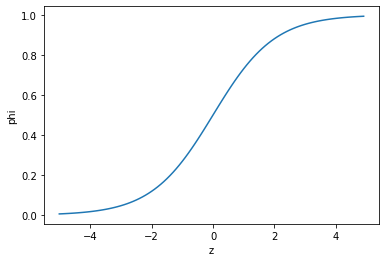

In [ ]:
import matplotlib.pyplot as plt

#로지스트 함수 f(x) = 1/(1+e^(-z))
#이번 예제에서 z = a*무게+b*길이+c*대각선+d*높이+e*두께+f 이다.
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

**로지스틱 회귀로 이진 분류 수행하기**

In [ ]:
#이진분류를 위해 먼저 생선데이터에서 Bream과 Smelt의 데이터만 뽑아 새로운 데이터세트를 만들어준다.
#train_target 배열에서 Bream과 Smelt만 True로 나머진 False로 만들어 배열을 채운다. 
#OR연산자(|)는 두 배열의 각각의 항을 OR연산하여 하나의 배열로 만들어준다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes[:10])

[False  True False False  True False False  True False  True]


In [ ]:
#넘파이 배열의 대괄호([])안에 논리 배열을 넣으면 논리 배열의 True에 해당하는 원소만 뽑아서 새로운 배열을 반환한다.
#다차원 배열일경우 안의 배열을 원소로 취급하여 새로운 배열을 반환한다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
#예시1
row = np.array([1,2,3,2,2,1,5,1])
row_logic = [True,False,True,True,False,False,False,True]
row_filtered = row[row_logic]
print(row_filtered)

[1 3 2 1]


In [ ]:
#예시2
row = np.array([[1,2],
               [2,5],
               [14,7],
               [6,4],
               [7,7]])
row_logic = [True,False,True,True,False]
row_filtered = row[row_logic]
print(row_filtered)

[[ 1  2]
 [14  7]
 [ 6  4]]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(target_bream_smelt[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[9.97573548e-01 2.42645182e-03]
 [9.85353735e-01 1.46462646e-02]
 [9.99600619e-01 3.99380701e-04]
 [9.70567338e-01 2.94326621e-02]
 [9.99410549e-01 5.89451003e-04]]


In [ ]:
print(lr.coef_, lr.intercept_)
#[[무게의 계수,길이의 계수,대각선의 계수,높이의 계수,두께의 계수],[절편]]

[[-0.43121119 -0.6301909  -0.71668012 -0.99597368 -0.74866343]] [-2.36291565]


In [ ]:
#decision_function메소드는 z값을 반환한다.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.01889584 -4.20881537 -7.825196   -3.49577577 -7.43572933]


In [ ]:
from scipy.special import expit

#scipy의 expit메소드는 z값에 대응하는 시그놀리아함수(로지스트 함수)값을 반환해준다.
#위의 predict_proba메소드와 비교하면 이진 분류에선 로지스트 함수값은 양성 클래스(Z값이 +)의 확률값과 같다는 것을 알 수 있다.
print(expit(decisions))

[0.00242645 0.01464626 0.00039938 0.02943266 0.00058945]


**로지스틱회귀로 다중분류 수행하기**

In [ ]:
#max_iter(기본값:100):로지스틱회귀 모델의 반복횟수를 설정해주는 매개변수
#값이 적으면 적다는 경고메세지가 뜸
#그렇게 될경우 max_iter의 값을 올려주어 반복횟수를 늘려준다.

#C(기본값:1):규제의 강도를 설정해주는 매개변수
#사이킥런의 로지스트회귀 모델은 기본적으로 L2규제를 적용한다.
#C값이 오를수록 규제가 약해지고, C값이 내릴수록 규제가 강해진다.
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

#분류모델에서 score메소드는 R^2값이 아닌 정확도를 출력해준다.
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8991596638655462
0.95


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Perch' 'Perch' 'Parkki' 'Perch']


In [ ]:
#회귀 결과 확률을 전체 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.001 0.888 0.007 0.076 0.    0.028]
 [0.028 0.    0.63  0.006 0.    0.    0.337]
 [0.    0.006 0.874 0.    0.095 0.019 0.005]
 [0.126 0.791 0.    0.    0.032 0.    0.05 ]
 [0.21  0.    0.332 0.149 0.008 0.    0.301]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
from scipy.special import softmax
#다중회귀의 경우 검산에 시그모이드 함수가 아닌, 소프트 맥스 함수를 사용한다.

#decision_function메소드는 7개의 선형 함수의 z값을 출력해준다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -2.64  -2.08   4.95   0.08   2.49  -4.29   1.48]
 [  5.01  -3.37   8.14   3.44  -2.01 -18.72   7.51]
 [ -7.29   0.45   5.38  -3.49   3.16   1.57   0.22]
 [  3.33   5.16  -2.77  -3.65   1.96  -6.43   2.4 ]
 [  3.9   -3.6    4.36   3.56   0.58 -13.05   4.26]]


In [ ]:
#소프트 맥스 함수 S(n) = e^n/(sig(e^n))(sig(e^n)은 n = 1부터 끝까지 일때 e^n값의 총합)
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
#위의 확률값과 같게 나오는것을 볼 수 있다.

[[0.    0.001 0.888 0.007 0.076 0.    0.028]
 [0.028 0.    0.63  0.006 0.    0.    0.337]
 [0.    0.006 0.874 0.    0.095 0.019 0.005]
 [0.126 0.791 0.    0.    0.032 0.    0.05 ]
 [0.21  0.    0.332 0.149 0.008 0.    0.301]]


In [ ]:
print(expit(decision))
#다중 회귀의 z값을 시그모이드함수에 넣으면 확률값이 다음과 같이 이상하게 나오는것을 볼 수 있다.

[[6.66941028e-02 1.11166267e-01 9.92977308e-01 5.20977870e-01
  9.23593983e-01 1.35621703e-02 8.14055845e-01]
 [9.93365533e-01 3.31890703e-02 9.99708099e-01 9.68945413e-01
  1.18089661e-01 7.42402685e-09 9.99454296e-01]
 [6.80911960e-04 6.10747712e-01 9.95416285e-01 2.95499406e-02
  9.59216578e-01 8.27839554e-01 5.55701216e-01]
 [9.65363676e-01 9.94305099e-01 5.92372847e-02 2.52428888e-02
  8.76350141e-01 1.61575531e-03 9.16577815e-01]
 [9.80170102e-01 2.65241733e-02 9.87340944e-01 9.72272793e-01
  6.41765980e-01 2.14507363e-06 9.86042928e-01]]
